# <center>Mini projet Machine Learning</center>

# Introduction
- India's largest marketplace for intra-city logistics, is revolutionizing the delivery sector with technology-driven solutions.
- Analyzing this dataset can provide significant insights into delivery dynamics, efficiency bottlenecks, and optimization opportunities.

# What is expected?
- Our task is to analyze the dataset to accurately predict delivery times for different orders. Your primary goal is to build a regression model using Random Forest, evaluate its performance, and provide insights for optimizing delivery operations.

# 1. Business Understanding



# 2. Data Understanding
Below are the libraries required

In [215]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [89]:
# read the file into a pandas dataframe
df = pd.read_csv('datadelevry.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172941 entries, 0 to 172940
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 168654 non-null  float64
 1   created_at                169541 non-null  object 
 2   actual_delivery_time      169474 non-null  object 
 3   store_id                  169489 non-null  object 
 4   store_primary_category    165369 non-null  object 
 5   order_protocol            168631 non-null  float64
 6   total_items               169453 non-null  float64
 7   subtotal                  169660 non-null  float64
 8   num_distinct_items        169489 non-null  float64
 9   min_item_price            169472 non-null  float64
 10  max_item_price            169521 non-null  float64
 11  total_onshift_partners    155613 non-null  float64
 12  total_busy_partners       155590 non-null  float64

In [91]:
# look at the top 20 rows
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,NaN,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,NaN,1600.0,6.0,6.0,9.0


In [93]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,168654.000000,168631.000000,169453.000000,169660.000000,169489.000000,169472.000000,169521.000000,155613.000000,155590.000000,155624.000000
mean,2.982414,2.850437,3.201543,2684.534174,2.678699,684.503009,1159.144708,44.813216,41.809801,58.090224
std,1.525751,1.487752,2.674022,1824.565715,1.634766,520.492937,560.203570,34.536004,32.187008,52.728748
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-3.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3397.000000,3.000000,945.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [95]:
df.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,169541,169474,169489,165369
unique,157206,154909,5930,73
top,2015-01-24 01:56:33,2015-02-05 03:10:31,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,6,918,16736


In [99]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

min(df['created_at']), max(df['created_at'])

(Timestamp('2014-10-19 05:24:15'), Timestamp('2015-02-18 06:00:44'))

### Insight
- There are **172941** entries with 14 columns
- The data is available between **19-Oct-2014 to 18-Feb-2015**, around 5 months of data
- There are null/missing values in each of the dates
- There are no **duplicates**
- The columns **market_id, total_onshift_partners, total_busy_partners** and **total_outstanding_orders** can be of type **int64**
- The columns **market_id, order_protocol** and **num_distinct_items** can be converted to categorical columns
- The columns **created_at** and **actual_delivery_time** need to be of type **datetime**
- Extract **hour** and **day** of the order placement from **created_at**
- Create **delivery_time_mins** column by subracting **created_at** from **actual_delivery_time**
- Columns **created_at** and **actual_delivery_time** can be dropped

In [103]:
df[['total_onshift_partners', 'total_busy_partners' , 'total_outstanding_orders']] = df[['total_onshift_partners', 'total_busy_partners' , 'total_outstanding_orders']].astype('Int64')
df[['market_id', 'order_protocol', 'num_distinct_items']] = df[['market_id', 'order_protocol', 'num_distinct_items']].astype('category')
df[['created_at', 'actual_delivery_time']] = df[['created_at', 'actual_delivery_time']].astype('datetime64[ns]')
df['created_hour']=df['created_at'].dt.hour
df['created_day']=df['created_at'].dt.dayofweek
df['delivery_time_mins'] = round((df['actual_delivery_time'] - df['created_at'])/pd.Timedelta(minutes=1), 0)
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172941 entries, 0 to 172940
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 168654 non-null  category
 1   store_id                  169489 non-null  object  
 2   store_primary_category    165369 non-null  object  
 3   order_protocol            168631 non-null  category
 4   total_items               169453 non-null  float64 
 5   subtotal                  169660 non-null  float64 
 6   num_distinct_items        169489 non-null  category
 7   min_item_price            169472 non-null  float64 
 8   max_item_price            169521 non-null  float64 
 9   total_onshift_partners    155613 non-null  Int64   
 10  total_busy_partners       155590 non-null  Int64   
 11  total_outstanding_orders  155624 non-null  Int64   
 12  created_hour              169541 non-null  float64 
 13  created_day               169

In [105]:
df.describe()

,total_items,subtotal,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_day,delivery_time_mins
count,169453.000000,169660.000000,169472.000000,169521.000000,155613.0,155590.0,155624.0,169541.000000,169541.000000,166144.000000
mean,3.201543,2684.534174,684.503009,1159.144708,44.813216,41.809801,58.090224,8.447951,3.219327,48.653078
std,2.674022,1824.565715,520.492937,560.203570,34.536004,32.187008,52.728748,8.660034,2.045736,348.928622
min,1.000000,0.000000,-86.000000,0.000000,-3.0,-5.0,-6.0,0.000000,0.000000,2.000000
25%,2.000000,1400.000000,299.000000,799.000000,17.0,15.0,17.0,2.000000,1.000000,35.000000
50%,3.000000,2200.000000,595.000000,1095.000000,37.0,34.0,41.0,3.000000,3.000000,44.000000
75%,4.000000,3397.000000,945.000000,1395.000000,65.0,62.0,85.0,19.000000,5.000000,56.000000
max,411.000000,27100.000000,14700.000000,14700.000000,171.0,154.0,285.0,23.000000,6.000000,141948.000000


### 2.1. Numerical variables

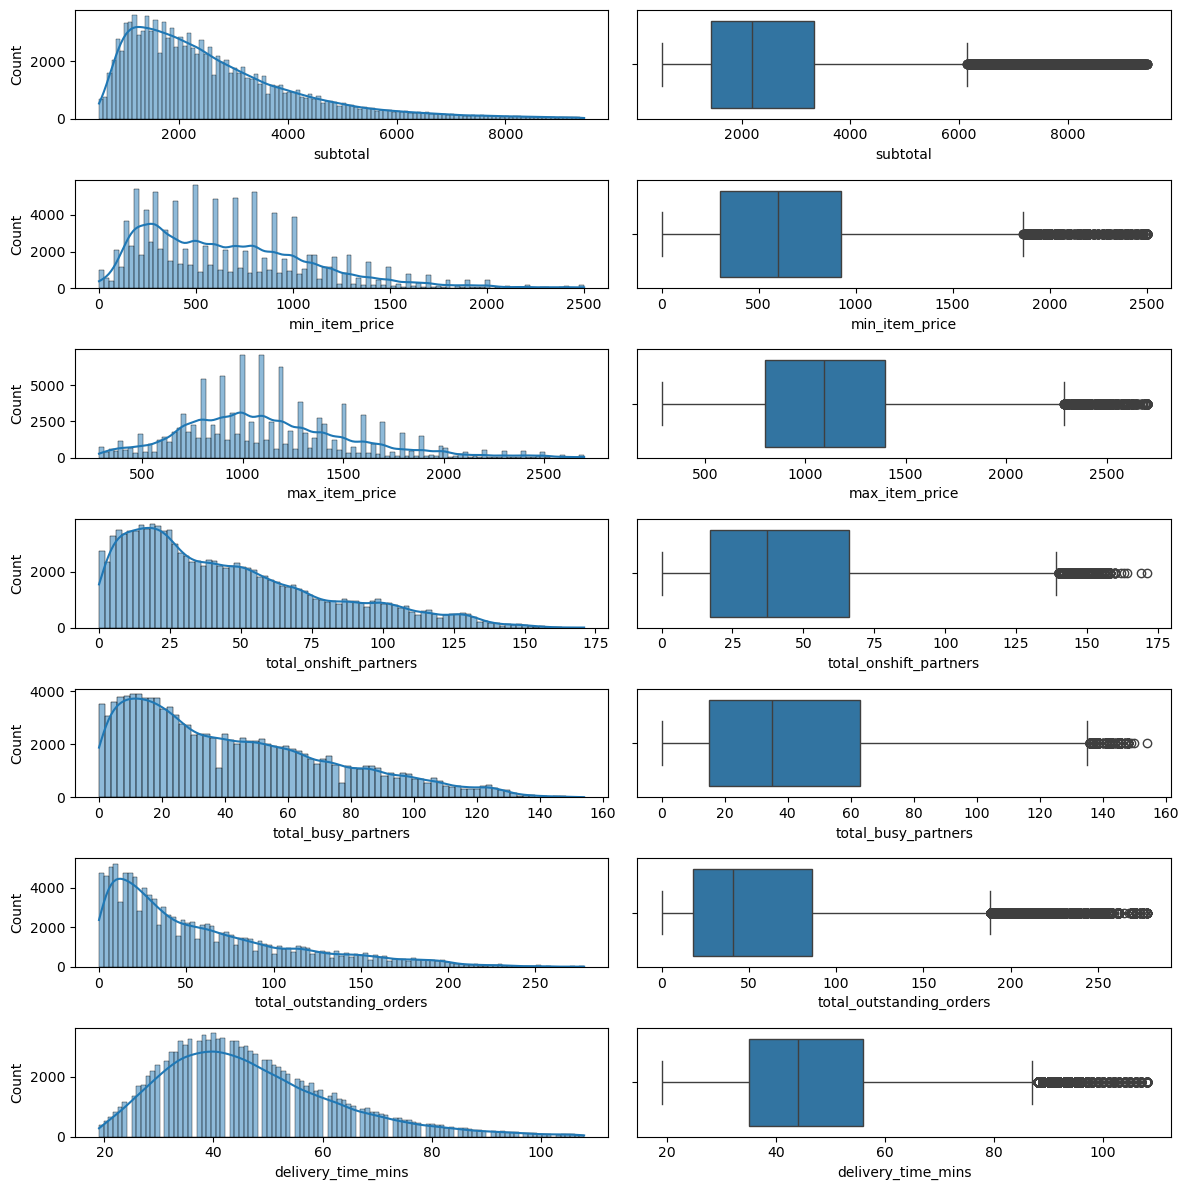

In [219]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize = (12, 12))
sns.histplot(data=df, x = "subtotal", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "subtotal", ax=axes[0,1])
sns.histplot(data=df, x = "min_item_price", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "min_item_price", ax=axes[1,1])
sns.histplot(data=df, x = "max_item_price", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "max_item_price", ax=axes[2,1])
sns.histplot(data=df, x = "total_onshift_partners", kde=True, ax=axes[3,0])
sns.boxplot(data=df, x = "total_onshift_partners", ax=axes[3,1])
sns.histplot(data=df, x = "total_busy_partners", kde=True, ax=axes[4,0])
sns.boxplot(data=df, x = "total_busy_partners", ax=axes[4,1])
sns.histplot(data=df, x = "total_outstanding_orders", kde=True, ax=axes[5,0])
sns.boxplot(data=df, x = "total_outstanding_orders", ax=axes[5,1])
sns.histplot(data=df, x = "delivery_time_mins", kde=True, ax=axes[6,0])
sns.boxplot(data=df, x = "delivery_time_mins", ax=axes[6,1])
plt.tight_layout()
plt.show()    

### Insight
- Majority of the **subtotal** is in the range of 0 to 5000
- Majority of **min_item_price** and **max_item_price** are in the range of 0 to 2000
- **total_onshift_partners**, **total_busy_partners**, **total_outstanding_orders** and **delivery_time_mins** seem to follow similar kind of distribution - right skewed
- The boxplot clearly shows the presence of **outliers** in **subtotal**, **min_item_price**, **max_item_price** and **delivery_time_mins**

### 2.2 Categorical variables

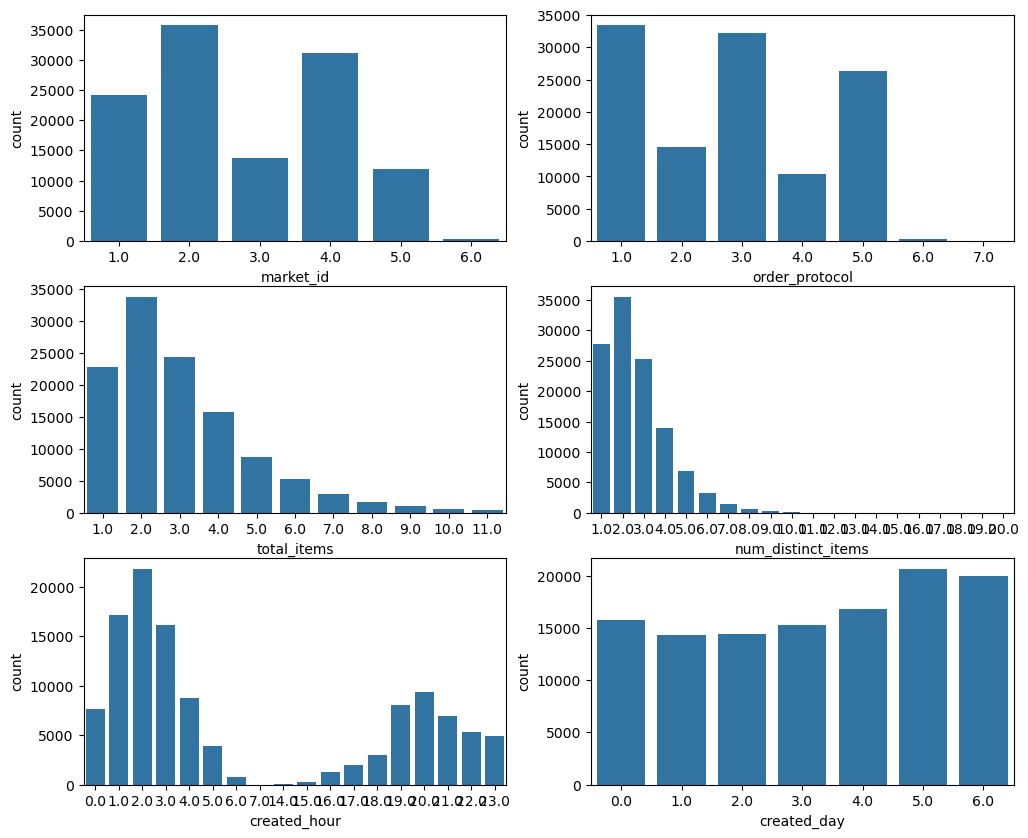

In [222]:
fig, axes = plt.subplots(3,2,figsize=(12,10))
sns.countplot(ax=axes[0,0], data=df, x='market_id')
sns.countplot(ax=axes[0,1], data=df, x='order_protocol')
sns.countplot(ax=axes[1,0], data=df, x='total_items')
sns.countplot(ax=axes[1,1], data=df, x='num_distinct_items')
sns.countplot(ax=axes[2,0], data=df, x='created_hour')
sns.countplot(ax=axes[2,1], data=df, x='created_day')
plt.show()

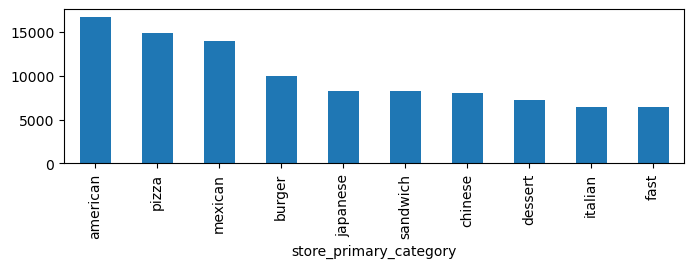

In [116]:
df['store_primary_category'].value_counts()[:10].plot(kind='bar', figsize = (8, 2))
plt.show()

In [124]:
df['store_id'].value_counts()[:5]

store_id
d43ab110ab2489d6b9b2caa394bf920f    918
757b505cfd34c64c85ca5b5690ee5293    839
faacbcd5bf1d018912c116bf2783e9a1    802
45c48cce2e2d7fbdea1afc51c7c6ad26    704
c9f0f895fb98ab9159f51fd0297e236d    584
Name: count, dtype: int64

### Insight
- market_id **2** is the major contributor
- Majority of order placement are through protocal **1** and **3**
- Majority of orders have **2** num_distinct_items as well as **2** total_items
- Majority of the orders are placed at around **2AM**
- Majority of the orders are placed on **weekends**
- Majority of orders delivered are from **american** restaurant
- Majority of orders delivered are from **d43ab110ab2489d6b9b2caa394bf920f** store

## 3.Data Preparation

In [224]:
## 4.2. Missing Values treatment

In [128]:
df.isna().sum()/len(df)*100

market_id                    2.478880
store_id                     1.996056
store_primary_category       4.378372
order_protocol               2.492179
total_items                  2.016873
subtotal                     1.897179
num_distinct_items           1.996056
min_item_price               2.005886
max_item_price               1.977553
total_onshift_partners      10.019602
total_busy_partners         10.032901
total_outstanding_orders    10.013242
created_hour                 1.965988
created_day                  1.965988
delivery_time_mins           3.930242
dtype: float64

### Insight
- Only **2.47%** of data has missing market_id. I will **drop** all these entries
- **4.37%** of data has missing store_primary_category. I will **replace** these with 'other' category
- Only **2.49%** of data has missing order_protocol. I will **drop** all these entries
- **10%** of data has missing total_onshift_partners, total_busy_partners and total_outstanding_orders each. I will use **KNN imputation** to replace the missing value.
- Only **3.93%** of data has missing delivery_timw_mins. I will **drop** these entries too

In [133]:
df.dropna(subset=['market_id', 'order_protocol', 'delivery_time_mins'], inplace=True)
df.fillna({'store_primary_category':'other'}, inplace=True)

Remove rows which have -ve values in min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders

In [226]:
mask = (df['min_item_price'] >= 0) & (df['max_item_price'] >= 0) & (df['total_onshift_partners'] >= 0) & (df['total_busy_partners'] >= 0) & (df['total_outstanding_orders'] >= 0)
df = df[mask]

In [228]:
# Columns to apply KNN Imputation
columns_to_impute = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)
# Apply KNN Imputer only to specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [232]:
df.isna().sum()/len(df)*100

market_id                   0.000000
store_id                    0.000000
store_primary_category      0.000000
order_protocol              0.000000
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          1.981271
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      0.000000
total_busy_partners         0.000000
total_outstanding_orders    0.000000
created_hour                0.000000
created_day                 0.000000
delivery_time_mins          0.000000
dtype: float64

Let us look at the distribution again after imputation

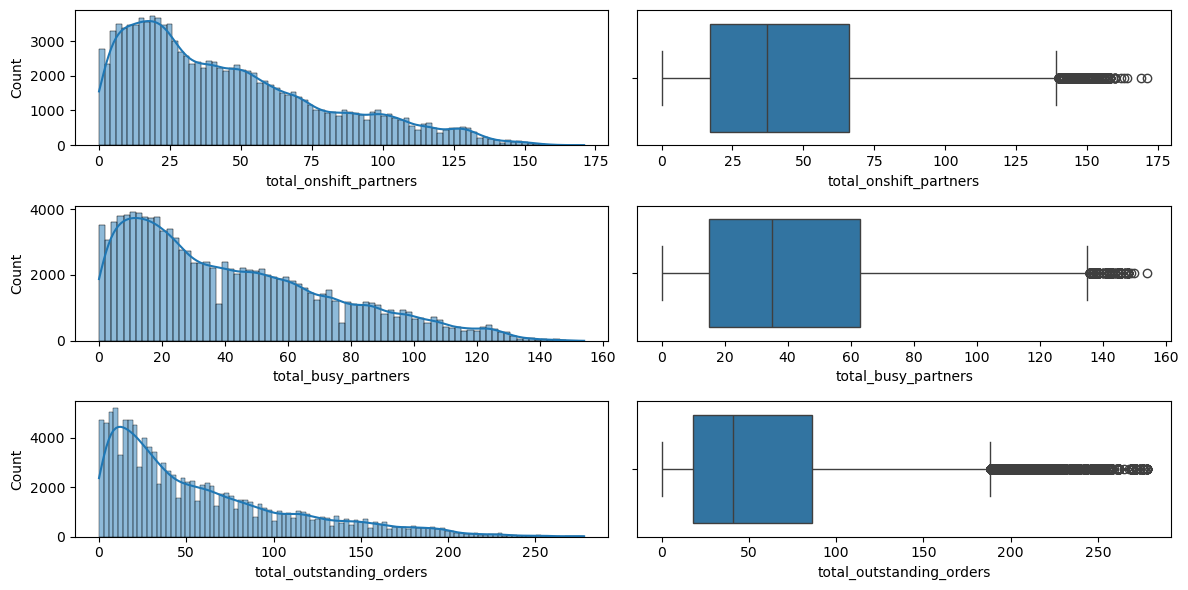

In [235]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12, 6))
sns.histplot(data=df, x = "total_onshift_partners", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "total_onshift_partners", ax=axes[0,1])
sns.histplot(data=df, x = "total_busy_partners", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "total_busy_partners", ax=axes[1,1])
sns.histplot(data=df, x = "total_outstanding_orders", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "total_outstanding_orders", ax=axes[2,1])
plt.tight_layout()
plt.show()    

## 3.2. Outliers treatment

In [238]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes
df['store_id']=df['store_id'].astype('category').cat.codes

In [240]:
for col in ['subtotal', 'min_item_price', 'max_item_price', 'delivery_time_mins', 'total_items']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

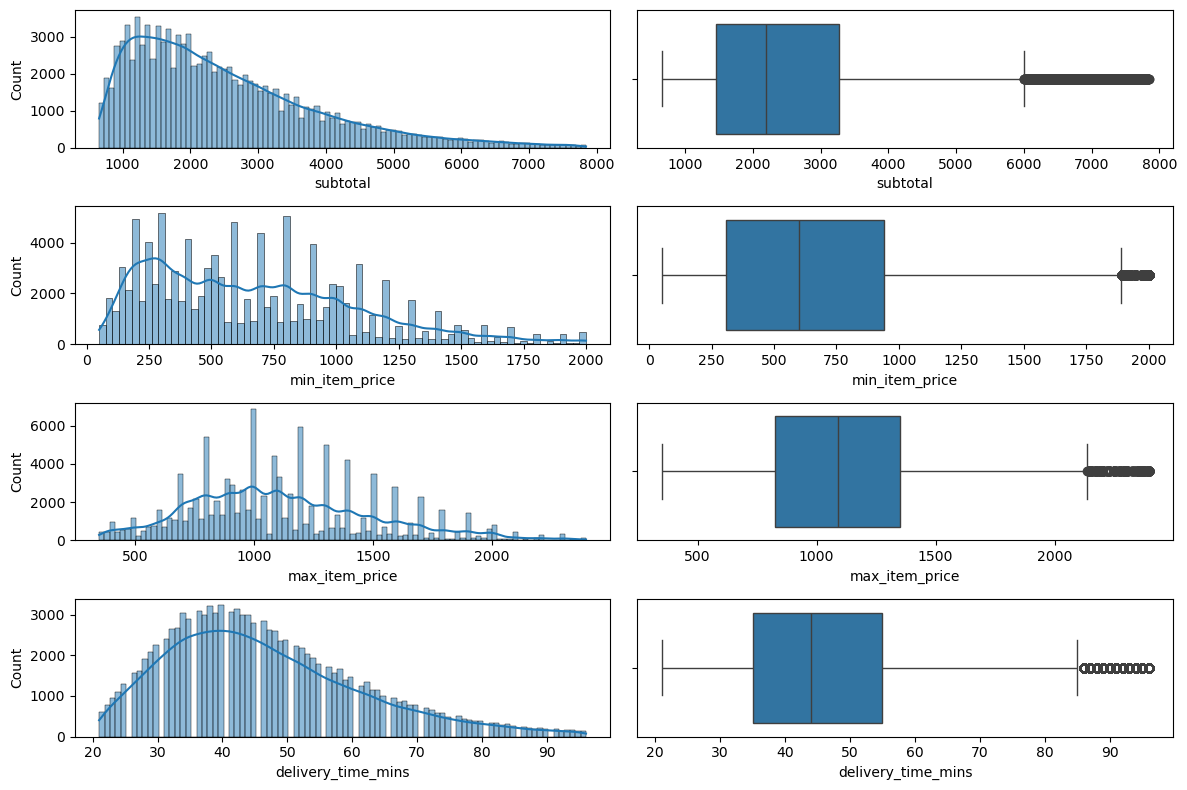

In [242]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (12, 8))
sns.histplot(data=df, x = "subtotal", kde=True, ax=axes[0,0])
sns.boxplot(data=df, x = "subtotal", ax=axes[0,1])
sns.histplot(data=df, x = "min_item_price", kde=True, ax=axes[1,0])
sns.boxplot(data=df, x = "min_item_price", ax=axes[1,1])
sns.histplot(data=df, x = "max_item_price", kde=True, ax=axes[2,0])
sns.boxplot(data=df, x = "max_item_price", ax=axes[2,1])
sns.histplot(data=df, x = "delivery_time_mins", kde=True, ax=axes[3,0])
sns.boxplot(data=df, x = "delivery_time_mins", ax=axes[3,1])
plt.tight_layout()
plt.show()    

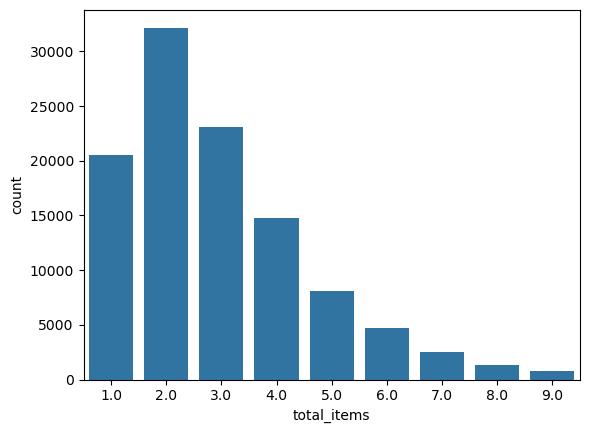

In [243]:
sns.countplot(data=df, x='total_items')
plt.show()

### Insight
- The distribution of data looks better after removal of outliers
- It can be seen that most of the delivery is done in **40mins**

## 3.3. Bivariate Analysis

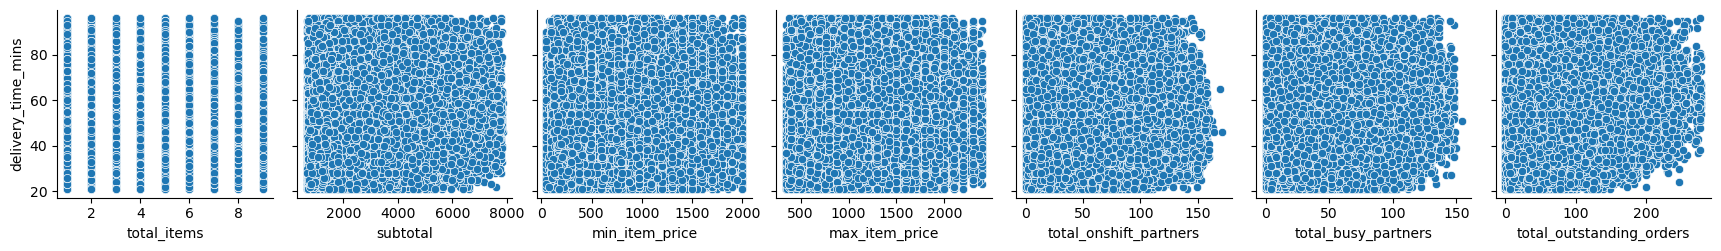

In [248]:
sns.pairplot(
    df, 
    x_vars=['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'],
    y_vars=['delivery_time_mins'],)
plt.show()

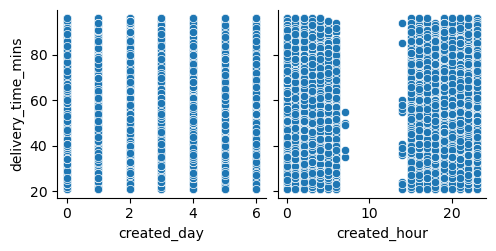

In [250]:
sns.pairplot(
    df, 
    x_vars=['created_day', 'created_hour'],
    y_vars=['delivery_time_mins'],)
plt.show()

### Insight
- There doesnt seem to be any relationship of delivery time with other features
- Delivery time is almost same for all days

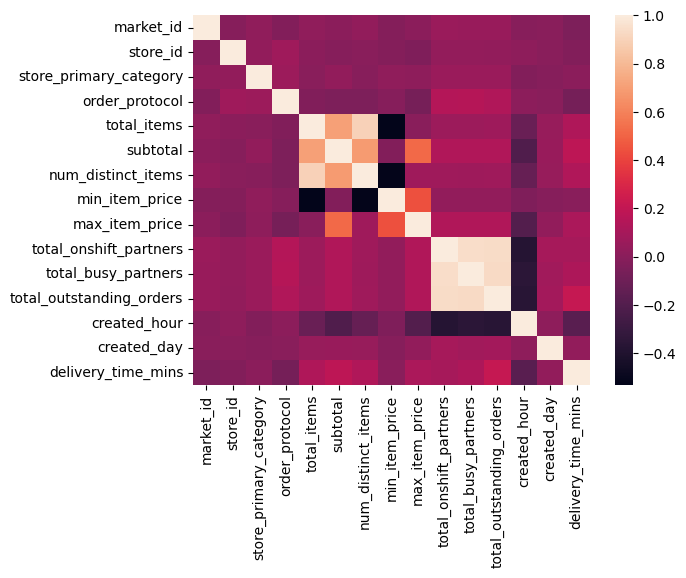

In [253]:
sns.heatmap(df.corr())
plt.show()

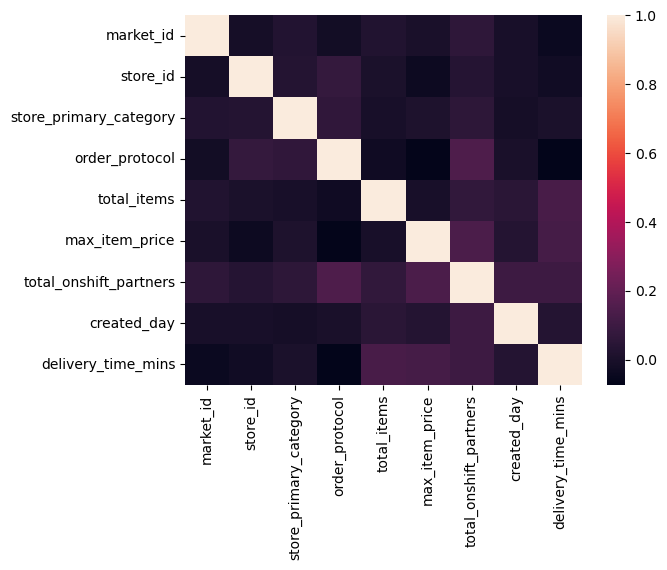

In [255]:
sns.heatmap(df[['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'max_item_price', 'total_onshift_partners', 'created_day', 'delivery_time_mins']].corr())
plt.show()

### Insight
- Here also we see that there is no relation between delivery time and other features

## 3.4. Train-test split

I feel the store id, store primary category and order protocol will not effect delivery time, hece dropping them from feature list

In [189]:
df_reduced = df.drop(['store_id', 'store_primary_category', 'order_protocol'], axis=1)

In [261]:
# Example to demonstrate categorical encoding
def encode_categorical_data(dataframe):
    # Assume some features are categorical
    categorical_columns = ['market_id']

    # Apply One-Hot Encoding
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_features = pd.DataFrame(
        one_hot_encoder.fit_transform(dataframe[categorical_columns]),
        columns=one_hot_encoder.get_feature_names_out(categorical_columns)
    )
    
    # Drop original categorical columns and concatenate encoded columns
    dataframe = dataframe.drop(categorical_columns, axis=1)
    dataframe = pd.concat([dataframe.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
    return dataframe

In [263]:
# Encode categorical data
df_reduced_encoded = encode_categorical_data(df_reduced)

In [265]:
df_reduced_encoded.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_hour,created_day,delivery_time_mins,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,21.0,1.0,67.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,20.0,3.0,30.0,0.0,1.0,0.0,0.0,0.0
2,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,21.0,1.0,51.0,0.0,1.0,0.0,0.0,0.0
3,3.0,5000.0,3.0,1500.0,1900.0,2.0,2.0,2.0,20.0,2.0,38.0,0.0,1.0,0.0,0.0,0.0
4,2.0,3900.0,2.0,1200.0,2700.0,10.0,9.0,9.0,2.0,5.0,26.0,0.0,1.0,0.0,0.0,0.0


# 3.5 Split data into features and target

In [267]:
# Split data into features and target
y = df_reduced_encoded['delivery_time_mins']
X = df_reduced_encoded.drop('delivery_time_mins', axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 4. Modeling


# 4.1 Create the Random Forest model


In [269]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. Create the Random Forest model

rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # allow full depth
    random_state=42,
    n_jobs=-1              # use all cores
)







# 4.2. Fit the model


In [ ]:
rf.fit(X_train, y_train)


# 4.3. Make predictions


In [286]:
y_pred = rf.predict(X_test)


# 5. Evaluatation


In [289]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

MSE: 198.95
RMSE: 14.10
MAE: 10.88
R²: 0.237
